Saving Screenshot 2025-01-16 111515.png to Screenshot 2025-01-16 111515 (4).png
Image uploaded successfully.


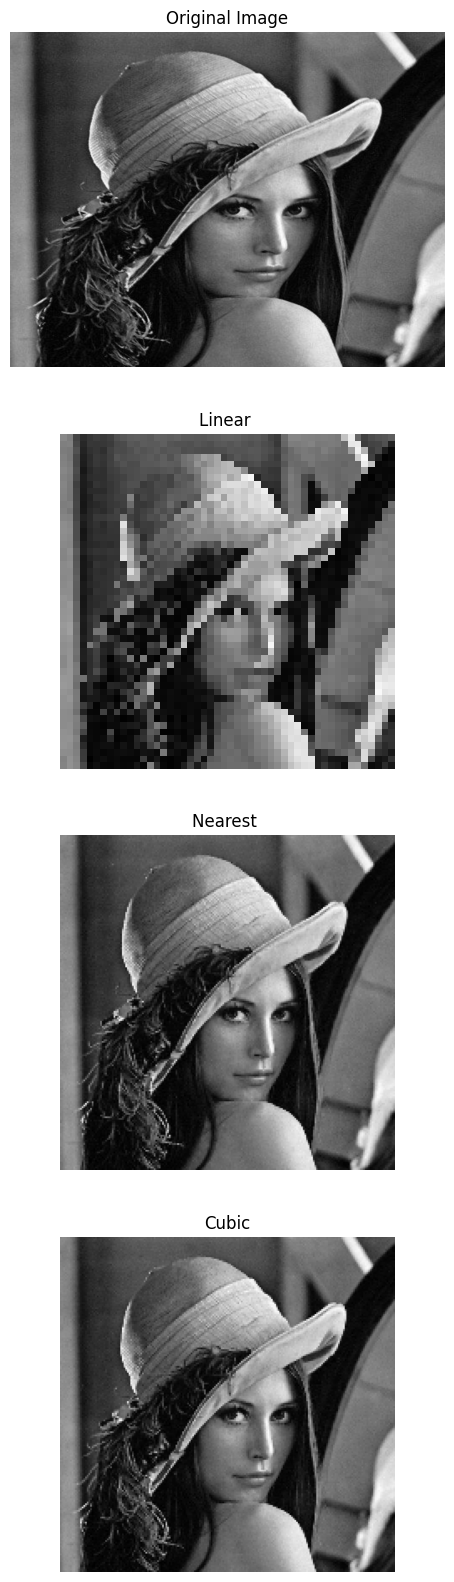

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    image_path = filename
img = cv2.imread(image_path)
if img is None:
    print("Error: Could not read the image.")
else:
    print("Image uploaded successfully.")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    def show_multiple(img_list, title_list):
        plt.figure(figsize=(10, 20))
        for idx, (image, title) in enumerate(zip(img_list, title_list)):
            plt.subplot(len(img_list), 1, idx + 1)
            plt.imshow(image)
            plt.title(title)
            plt.axis('off')
        plt.show()

    def adjust_size(img, w, h, interp_method):
        return cv2.resize(img, (w, h), interpolation=interp_method)

    small_linear = adjust_size(img, 50, 50, cv2.INTER_LINEAR)
    large_nearest = adjust_size(img, 200, 200, cv2.INTER_NEAREST)
    large_cubic = adjust_size(img, 200, 200, cv2.INTER_CUBIC)

    show_multiple([img, small_linear, large_nearest, large_cubic],
                  ['Original Image', 'Linear ', 'Nearest ', 'Cubic'])

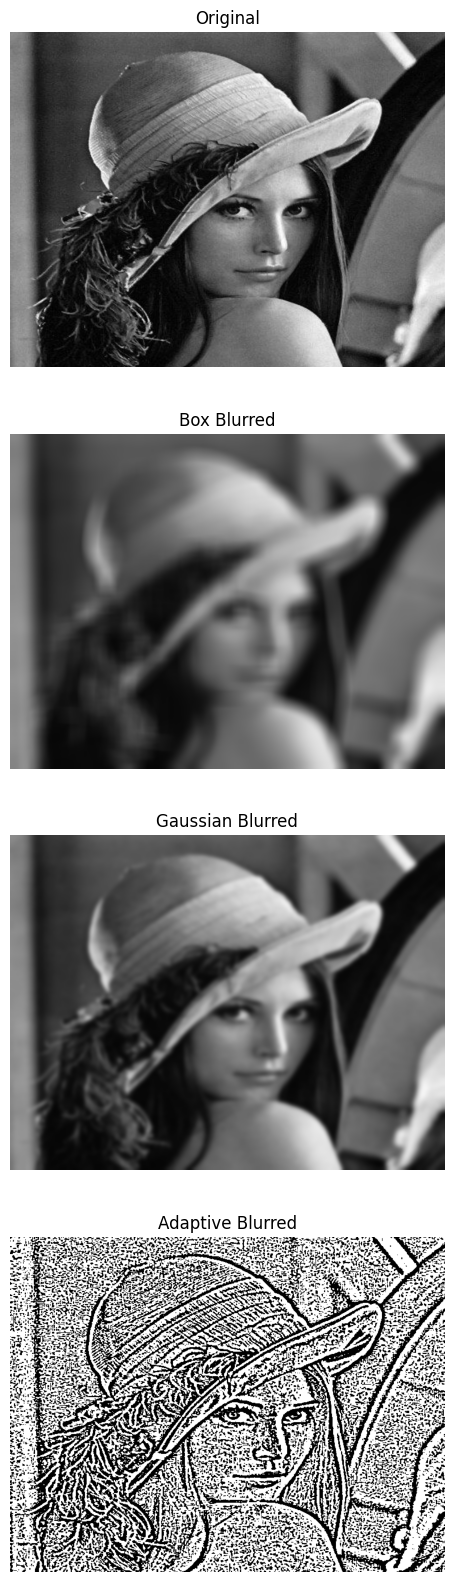

In [ ]:

    def show_images_vertically(img_list, title_list):
        plt.figure(figsize=(10, 20))
        for idx, (image, title) in enumerate(zip(img_list, title_list)):
            plt.subplot(len(img_list), 1, idx + 1)
            plt.imshow(image)
            plt.title(title)
            plt.axis('off')
        plt.show()

    def apply_blur(image, method, kernel_size=(15, 15)):
        if method == 'box':
            return cv2.blur(image, kernel_size)
        elif method == 'gaussian':
            return cv2.GaussianBlur(image, kernel_size, 0)
        elif method == 'adaptive':
            gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
            blurred = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
            return cv2.cvtColor(blurred, cv2.COLOR_GRAY2RGB)

    box_blurred = apply_blur(img, 'box', kernel_size=(30, 30))
    gaussian_blurred = apply_blur(img, 'gaussian', kernel_size=(21, 21))
    adaptive_blurred = apply_blur(img, 'adaptive')

    show_images_vertically([img, box_blurred, gaussian_blurred, adaptive_blurred],['Original', 'Box Blurred', 'Gaussian Blurred', 'Adaptive Blurred'])


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import numpy as np

digits = load_digits()
X, y = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

def evaluate_model(model, X_train, X_test, y_train, y_test, kf):
    cross_val_accuracies = cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy')
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f_measure = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)

    return {
        'cross_val_accuracy_mean': np.mean(cross_val_accuracies),
        'cross_val_accuracy_std': np.std(cross_val_accuracies),
        'test_accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f_measure': f_measure,
        'confusion_matrix': cm,
        'roc_auc': roc_auc
    }

kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}
for name, model in models.items():
    result = evaluate_model(model, X_train, X_test, y_train, y_test, kf)
    results[name] = result

    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {result['cross_val_accuracy_mean']:.4f} ± {result['cross_val_accuracy_std']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print(f"Precision: {result['precision']:.4f}")
    print(f"Recall: {result['recall']:.4f}")
    print(f"F-Measure: {result['f_measure']:.4f}")
    print(f"ROC AUC: {result['roc_auc']:.4f}")
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("\n")


Model: Random Forest
Cross-Validation Accuracy: 0.9729 ± 0.0092
Test Accuracy: 0.9722
Precision: 0.9726
Recall: 0.9722
F-Measure: 0.9722
ROC AUC: 0.9998
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


Model: SVM
Cross-Validation Accuracy: 0.9868 ± 0.0071
Test Accuracy: 0.9861
Precision: 0.9862
Recall: 0.9861
F-Measure: 0.9861
ROC AUC: 1.0000
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


